# 0. Loading dataset

In [10]:
# Import pandas, matplotlib and seaborn libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Set the parameters and the style for plotting
params = {'figure.figsize':(12,8),
         'axes.labelsize':13,
         'axes.titlesize':16,
         'xtick.labelsize':11,
         'ytick.labelsize':11
         }
plt.rcParams.update(params)
sns.set_style("whitegrid")

We will be again using the famous Titanic dataset to explore missing data, let's started by loading the dataset.

In [12]:
# Load the dataset 'Data/titanic_data.csv' and store it to variable data
data = pd.read_csv('Data/titanic_data.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 1. First look at the missing values

To detect missing values we can use Pandas `isnull()` method along with `.sum()`.   

In [14]:
# Get the summary of missing values using .isnull().sum()
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see there are three columns which contain missing values: 'Age', 'Cabin' and 'Embarked'. If we want to compute the proportion of missing values we can use `.mean()` 

In [35]:
# Compute the proportion of missing values in dataset's columns
print(data.isnull().mean()*100)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


If we want to visualize the location of missing values, we can use `seaborn's heatmap` that tell us where the missing value occur. We set paramater `cbar = False` as the colorbar don't need to be drawn in this case. Or we use basic barplot.

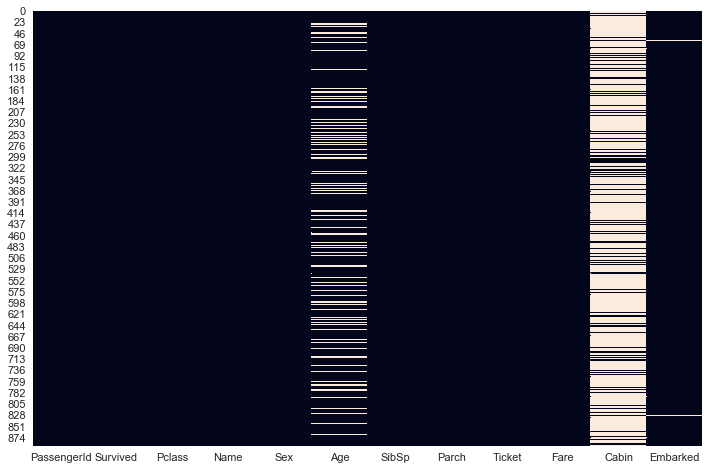

In [32]:
# Visualize missing values using heatmap
sns.heatmap(data.isnull(), cbar = False);

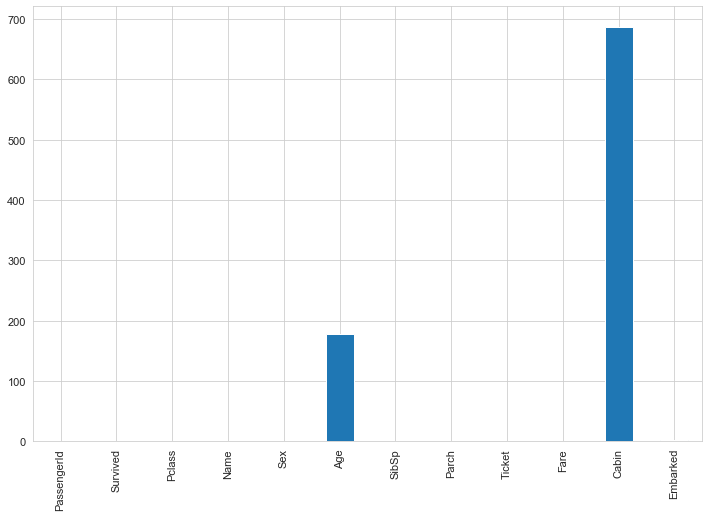

In [33]:
# Visualize missing values using barplot
data.isnull().sum().plot(kind = 'bar');

# 2. Concepts of missing values

According to Rubin's theory $^{1}$, every datapoint has some probability of being missing in the dataset. The process that governs these probabilities is called **the missing data mechanism**. 

## 2.1 MNAR: Missing data Not At Random

MNAR means that the probability of being missing varies for reasons that are unknown to us. Let's look at columns 'Age' and 'Cabin' in which passengers were traveling. We found out that the column 'Cabin' contain approximately 77% missing values, the column 'Age' almost 20% missing values. 
The age or a cabin could not be establish for people who did not survive that night. We assume that survivals were asked for such information. But can we infer this when we look at the data ? In this case, we expect that observations with people who did not survive should have more missing values. Let's find out.



In [37]:
# Filter the dataset based on people who survived
survived = data.query('Survived == 1')
survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [63]:
# Print the percentage of missing values in column 'Cab60.in' in case of survivals
print('The percentage of missing values: {0:.1f} %'.format(survived['Cabin'].isna().mean()*100))

The percentage of missing values: 60.2 %


In [45]:
# Filter the dataset based on people who did not survived
not_survived = data.query('Survived == 0')
not_survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [64]:
# Print the percentage of missing values in column 'Cabin' in case of people who didn't survive
print('The percentage of missing values: {0:.1f} %'.format(not_survived['Cabin'].isna().mean()*100))

The percentage of missing values: 87.6 %


The results we obtained are same as our expectations, that for people who did not survive there is more missing values (approximately 87.6%) compared to the survivals (60.2 %).

In [65]:
# TASK 1 >>>> Now it's your turn to explore the column 'Age' in the same way 
#             and think about whether the values are missing not at random
print(survived['Age'].isna().mean()*100)
print(not_survived['Age'].isna().mean()*100)

15.204678362573098
22.768670309653917


## 2.2 MCAR: Missing data Completely At Random 

When data are missing completely at random it means that the probability of being missing is the same for all observations in the dataset, i.e. the cause of the missing data is unrelated to the data.

Let's take as an example column 'Embarked' and its missing values.

In [85]:
# Get the rows where the values in 'Embarked' column are missing
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Mrs. Stone was travelling in the first class with her maid Miss. Amelie Icard. They occupied the same Cabin B28, but the data about port of embarkation are missing. But we can not tell if the Embarked variable depends on any other variable. We can also see, that these women have survived, so we assume that they were asked for that information. It could happen that this information was simply lost when this dataset was created. The probability of losing these information is the same for every person on the Titanic, altough it would be probably impossible to prove. 

For curiosity: You can find out more information about Mrs. Stone and her maid [here](https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html), where the information about port is completed.

## 2.3 MAR: Missing At Random

We can say that the data are missing at random if the probability of being missing is the same only within groups defined by the observed data. Example of this case is when we take a sample from a population, where the probability to be included depends on some known property.

# Appendix

$^{1}$ Inference and missing data, DONALD B. RUBIN, Biometrika, Volume 63, Issue 3, December 1976, Pages 581–592,